## LAB1: Gerações, representações e transformações de dados multivariados

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: 
## Número:

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## A45977-Lab1.ipynb (A45977: Eduardo Marques)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.
# Ficheiros que não se encontrem em conformidade com o formato especificado não serão corrigidos!

<hr style="border:2px solid black"> </hr>


In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import scipy.linalg as la
rd.seed(42)

# Pergunta 1:
## a) Gere 5000 (5 mil) pontos a duas dimensões, em que a primeira dimensão é uma variável aleatória Gaussina de média 2 e variância 3, e em que a segunda dimensão é uma variável aleatória uniformemente distribuída entre $[-1, 3]$. Os pontos gerados deverão estar num matriz $X$ de $2\times5000$.
## b) Visualize os pontos gerados. Certifique-se que no gráfico, ambas as dimensões se encontram na mesma escala.

Média da dimensão 1: 2.01
Covariância da dimensão 1: 2.979

Dimensão de X:  (2, 5000)

Matriz de covariância de X: [[ 2.979 -0.01 ]
 [-0.01   1.305]]
Média de X: 1.495


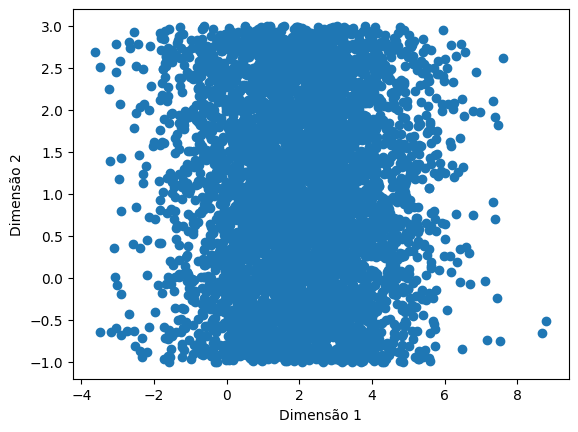

In [2]:
############   a)   ############
N = 5000

d1 = rd.randn(N)*np.sqrt(3)+2
#para a primeira dimensão é feita a media multiplicando-se depois pela raiz da variância
print('Média da dimensão 1:', np.round(np.mean(d1), 3))
print('Covariância da dimensão 1:', np.round(np.cov(d1), 3))

#rand é de 0 a 1, logo multiplicamos por 4 para passar a ser de 0 a 4 e subtraimos 1 para termos a dim -1 a 3
d2 = rd.rand(N)*4 - 1  

print()

X = np.vstack((d1, d2))
print('Dimensão de X: ', X.shape)
print()
print('Matriz de covariância de X:', np.round(np.cov(X), 3))
print('Média de X:', np.round(np.mean(X), 3))

############   b)   ############

plt.scatter(X[0], X[1])
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.show()

# Pergunta 2:
## a) Através duma transformação matricial do tipo $X2=A\times X+b$ ($A$ matriz de $2\times2$, $b$ vetor de $2\times1$), transforme os dados de modo a estes terem média nula e matriz de covariância igual à matriz de identidade (de notar que a variância da primeira e da segunda dimensão de $X$ são 3 e 4/3, respetivamente).
## b) Através duma transformação matricial do tipo $X3=C\times X2$ ($C$ matriz de $2\times2$), transforme os dados de modo a estes terem a matriz de covariância $\Sigma=\begin{bmatrix}2.5&1\\1&0.5\end{bmatrix}$.
## c) Visualize os pontos gerados (matriz $X3$). Vizualise igualmente no mesmo gráfico os pontos da alínea anterior (matriz $X$). Certifique-se que no gráfico, ambas as dimensões se encontram na mesma escala. 

[[0.57735027 0.        ]
 [0.         0.8660254 ]]
Matriz de covariância de X2: [[ 0.993 -0.005]
 [-0.005  0.978]]
Média de X2: 2.504

S:  [[2.5 1. ]
 [1.  0.5]]
Matriz de covariância de X3: [[2.5 1. ]
 [1.  0.5]]


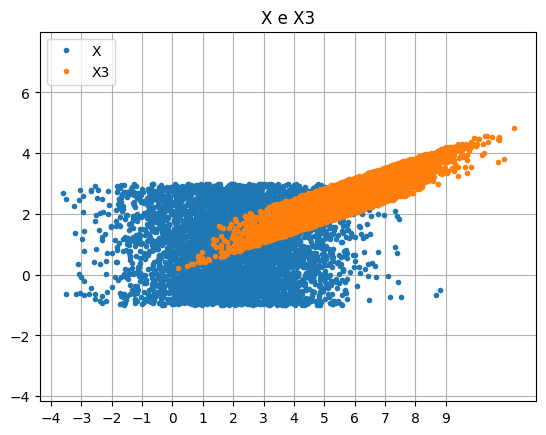

In [3]:
############   a)   ############

#matriz com os vals contrários da variância de da 1ª e 2ª dim de x
A = np.diag(np.sqrt([1/3, 3/4]))
print(A)
b = np.array([2, 1])

X2 = np.dot(A, X) + b[:, np.newaxis] 

print('Matriz de covariância de X2:', np.round(np.cov(X2), 3))
print('Média de X2:', np.round(np.mean(X2), 3))
#val da media perto de 0, logo podemos assumir que a média é nula

############   b)   ############
print()

S = np.array([[2.5, 1],[1, 0.5]])
print('S: ', S)

C = la.sqrtm(S)
X3 = np.dot(C, X2)
print('Matriz de covariância de X3:', np.round(np.cov(X3), 1))

############   c)   ############
print()

plt.plot(X[0], X[1], '.', label='X')
plt.plot(X3[0], X3[1], '.', label='X3')
plt.xticks(range(-10, 10))
plt.legend(loc="upper left")
plt.title('X e X3')
plt.axis('equal')
plt.grid()



# Pergunta 3:
## Considere uma matriz $X4$ de $2\times10000$ obtida com a concatenação das matrizes $X$ e $X3$. Faça os histogramas de cada dimensão dos dados da matriz $X4$. Certifique-se que o número de intervalos é apropriado, e a sua largura também, para uma boa visualização dos mesmos.

Dimensão de X4 (2, 10000)


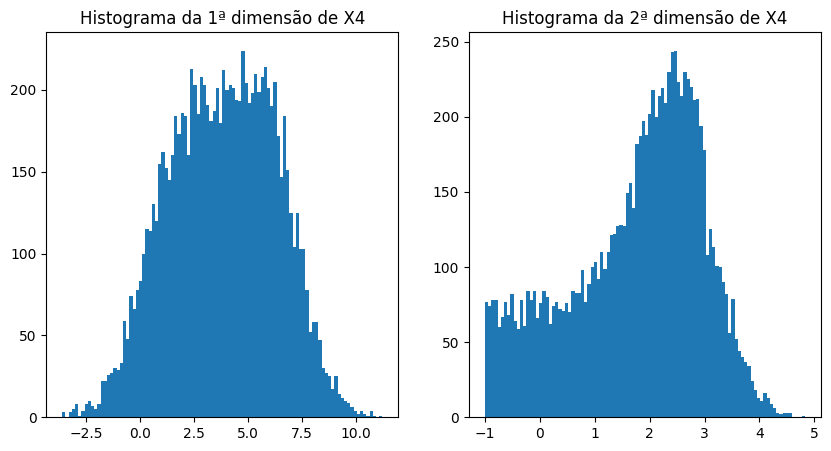

In [4]:
X4 = np.hstack((X, X3))
print('Dimensão de X4', X4.shape)

n_bins = 100

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(X4[0], bins=n_bins)
plt.title('Histograma da 1ª dimensão de X4')

plt.subplot(1, 2, 2)
plt.hist(X4[1], bins=n_bins)
plt.title('Histograma da 2ª dimensão de X4')

plt.show()
